In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
session = Session(engine)

In [17]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [18]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [19]:
# Save references to each table
for class_name in Base.classes.keys():
    # Assign the class to a variable with the same name as the class
    globals()[class_name] = Base.classes[class_name]


In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
Measurement = Base.classes.measurement
most_recent_date = session.query(func.max(Measurement.date)).one()[0]
print(f"The most recent date in the dataset is: {most_recent_date}")

The most recent date in the dataset is: 2017-08-23


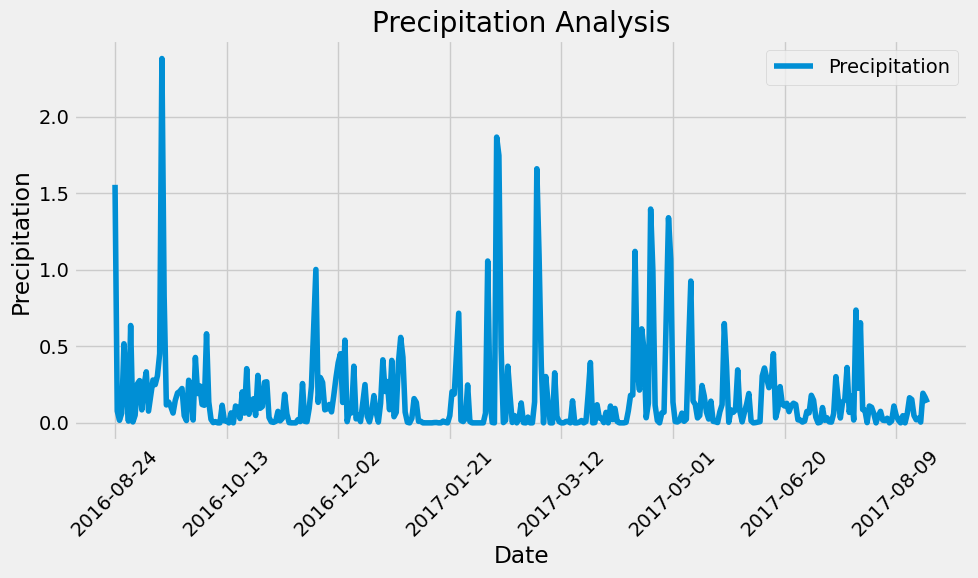

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date, "%Y-%m-%d")
date_one_year_ago = most_recent_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query_results = session.query(Measurement.date, func.avg(Measurement.prcp))\
    .filter(Measurement.date >= date_one_year_ago)\
    .group_by("date")\
    .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query_results, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation Analysis", figsize=(10, 6))
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
df

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data

# Calculate summary statistics for the precipitation column ('prcp')
precipitation_stats = df['Precipitation'].describe()

# Display the summary statistics
print(precipitation_stats)

count    365.000000
mean       0.169987
std        0.295722
min        0.000000
25%        0.008571
50%        0.070000
75%        0.191667
max        2.380000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [35]:
# Calculate the total number of unique stations
total_stations = session.query(func.count(station.station.distinct())).scalar()

print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Count the occurrences of each station
station_counts = df['station'].value_counts()

# Sort the counts in descending order
station_counts = station_counts.sort_values(ascending=False)

print(station_counts)

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Load the measurements data from the CSV file
file_path = '/Users/alexandrachandler/Desktop/ut/homework/Mod 10/SurfsUp/Resources/hawaii_measurements.csv'
measurements_df = pd.read_csv(file_path)

# Find the most active station
most_active_station = measurements_df['station'].value_counts().idxmax()

# Filter data for the most active station
station_data = measurements_df[measurements_df['station'] == most_active_station]

# Calculate the lowest, highest, and average temperature
min_temp = station_data['tobs'].min()
max_temp = station_data['tobs'].max()
avg_temp = station_data['tobs'].mean()

print(f"Lowest Temperature: {min_temp}°F")
print(f"Highest Temperature: {max_temp}°F")
print(f"Average Temperature: {avg_temp:.2f}°F")

In [ ]:
# Find the most active station
most_active_station = measurements_df['station'].value_counts().idxmax()

# Filter data for the most active station and convert 'date' to datetime
station_data = measurements_df[measurements_df['station'] == most_active_station]
station_data['date'] = pd.to_datetime(station_data['date'])

# Find the last date of observation for the most active station
last_date = station_data['date'].max()

# Calculate the date one year before the last date
date_one_year_ago = last_date - timedelta(days=365)

# Filter the data for the last 12 months
one_year_data = station_data[station_data['date'] >= date_one_year_ago]

# Plotting the results as a histogram
one_year_data['tobs'].plot(kind='hist', bins=12, title='Temperature Observations')
plt.xlabel('Temperature')
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()